In [1]:
!conda activate DS807
#!pip install tensorflow-gpu==2.6
#!pip uninstall tensorflow-gpu

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from numpy import asarray
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input


# Task 1 - Getting the data in

# The pictures was divided by taken the entire set of pictures taking 80% for train, 20 for test, and 10% from the train set to validation.
# Dette betyder at vi fra det originale data har:
# test: 520 pictures, 260 of each
# train: 1664 pictures, 832 of each
# Validation: 416 pictures, 206 of each

# Task 2 - Create the datagenerators

Due to the high amount of data, you need to write a datagenerator to load the images. This requires you to use the _ImageDataGenerator_ (as shown in Keras Intro - 2) in which you must apply at least one on-the-fly data augmentation. Which type of data augmentation is up to you, but you need to justify your choice in your report. On top of the _ImagaDataGenerator_ you need to apply the _.flow_from_directory_ function to make it work with the directory tree in Task 1

We need to use (at least) one on-the-fly augmentation. Which is better to use? Zooming, flipping, shifting, changing brightness? Should we use more than one? 

ImageDataGenerator: 
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
flow_from_directory: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

In [82]:
os.getcwd()

'C:\\Users\\jakob\\OneDrive\\Kandidat SDU\\DATASCIENCE\\DS809 Deep learning\\Deep_learning_Data'

In [83]:
train_datagen = ImageDataGenerator(rescale=1./255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) 
validation_datagen = ImageDataGenerator(rescale=1./255.0) 
test_datagen = ImageDataGenerator(rescale=1./255.0)

train_generator = train_datagen.flow_from_directory('Train/', target_size=(150, 150), batch_size=32, class_mode='binary') 
validation_generator = validation_datagen.flow_from_directory('Validation/', target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory('Test/', target_size=(150, 150), class_mode='binary')

Found 1672 images belonging to 2 classes.
Found 416 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [84]:
cnn_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), 
                input_shape=(150,150,3), 
                activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.SpatialDropout2D(0.2),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
                activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.SpatialDropout2D(0.2),
        tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
                activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.SpatialDropout2D(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, 
                activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1,
                activation='sigmoid'),
        ], name='classifier')

In [85]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9) #additional 0
cnn_model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
spatial_dropout2d_12 (Spatia (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
spatial_dropout2d_13 (Spatia (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       7

In [86]:
history = cnn_model.fit(train_generator, steps_per_epoch=1664//32, epochs=200, batch_size=32, validation_data=validation_generator, validation_steps=416//32)

Epoch 1/200
52/52 [==============================] - 8s 151ms/step - loss: 0.6920 - accuracy: 0.5220 - val_loss: 0.6911 - val_accuracy: 0.5096
Epoch 2/200
52/52 [==============================] - 8s 146ms/step - loss: 0.6973 - accuracy: 0.5104 - val_loss: 0.6879 - val_accuracy: 0.5024
Epoch 3/200
52/52 [==============================] - 8s 146ms/step - loss: 0.6923 - accuracy: 0.5268 - val_loss: 0.6874 - val_accuracy: 0.5793
Epoch 4/200
52/52 [==============================] - 8s 147ms/step - loss: 0.6904 - accuracy: 0.5323 - val_loss: 0.6857 - val_accuracy: 0.5409
Epoch 5/200
52/52 [==============================] - 8s 145ms/step - loss: 0.6884 - accuracy: 0.5366 - val_loss: 0.6847 - val_accuracy: 0.5385
Epoch 6/200
52/52 [==============================] - 8s 145ms/step - loss: 0.6892 - accuracy: 0.5402 - val_loss: 0.6841 - val_accuracy: 0.6058
Epoch 7/200
52/52 [==============================] - 8s 146ms/step - loss: 0.6880 - accuracy: 0.5488 - val_loss: 0.6897 - val_accuracy: 0.4928

In [87]:
cnn_model.evaluate(test_generator, steps=len(test_generator))

17/17 [==============================] - 1s 31ms/step - loss: 0.5246 - accuracy: 0.7673


[0.5245948433876038, 0.767307698726654]

In [88]:
cnn_model.save('VGG_model_200.pb')

INFO:tensorflow:Assets written to: VGG_model_200.pb\assets


# Visualise: curves

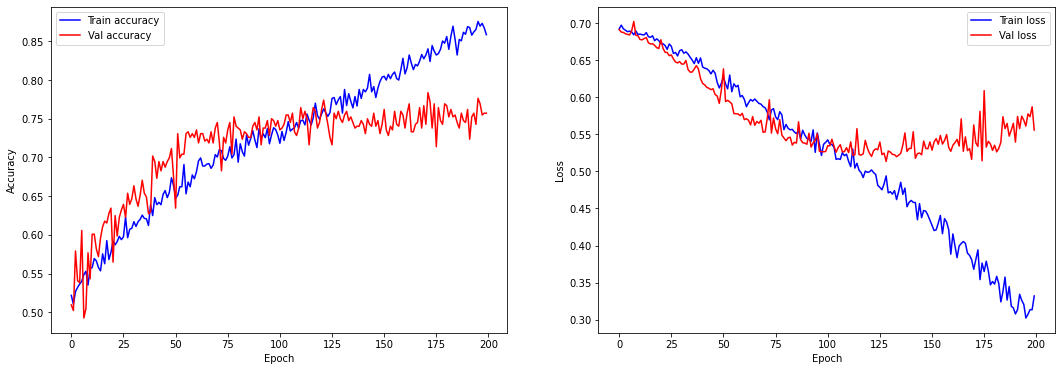

In [89]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

#’bo’ is for blue dot, ‘b’ is for solid blue line

pyplot.rcParams["figure.figsize"] = (18,6)

pyplot.subplot(1,2,1)

pyplot.plot(history.history['accuracy'], 'b', label = 'Train accuracy')
pyplot.plot(history.history['val_accuracy'], 'r',label = 'Val accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend()

pyplot.subplot(1,2,2)

pyplot.plot(history.history['loss'], 'b', label = 'Train loss')
pyplot.plot(history.history['val_loss'], 'r', label = 'Val loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()

pyplot.show()

# Visualise: Feature maps

In [78]:
#Check for convolutional layer shapes and indexing
for i in range(len(cnn_model.layers)):
    layer = cnn_model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d_9 (None, 148, 148, 32)
3 conv2d_10 (None, 72, 72, 64)
6 conv2d_11 (None, 34, 34, 128)


In [79]:
#Save model layers on variables
visualize_layer0 = Model(inputs=cnn_model.inputs , outputs=cnn_model.layers[0].output)
visualize_layer3 = Model(inputs=cnn_model.inputs , outputs=cnn_model.layers[3].output)
visualize_layer6 = Model(inputs=cnn_model.inputs , outputs=cnn_model.layers[6].output)

In [80]:
#load and transform image for use in visualization
image = load_img( str(os.getcwd()) + "\\Train\\cats\\cat.1666.jpg" , target_size=(150,150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
#Check image shape is applicable    
print(image.shape)

(1, 150, 150, 3)


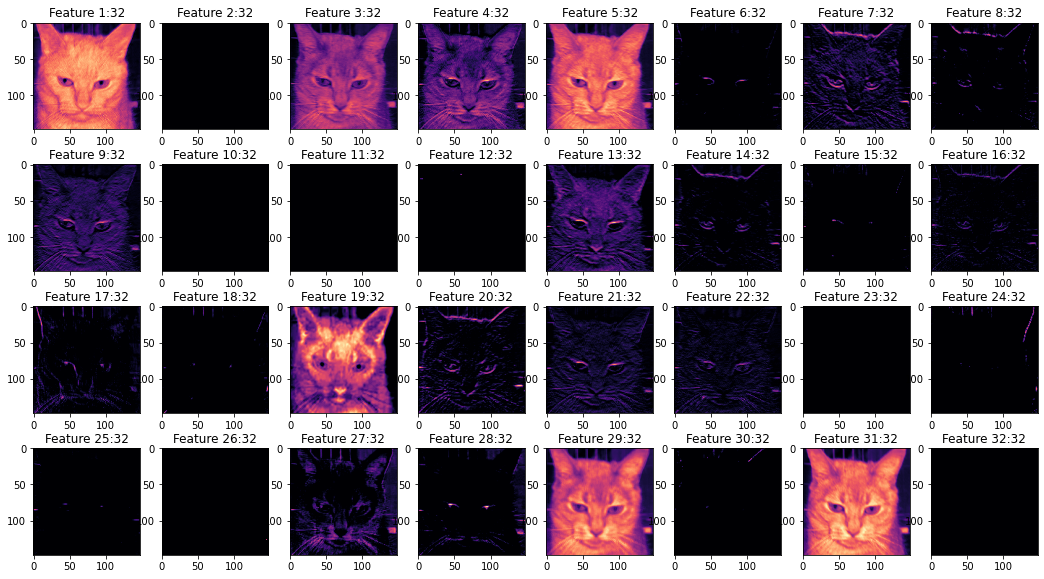

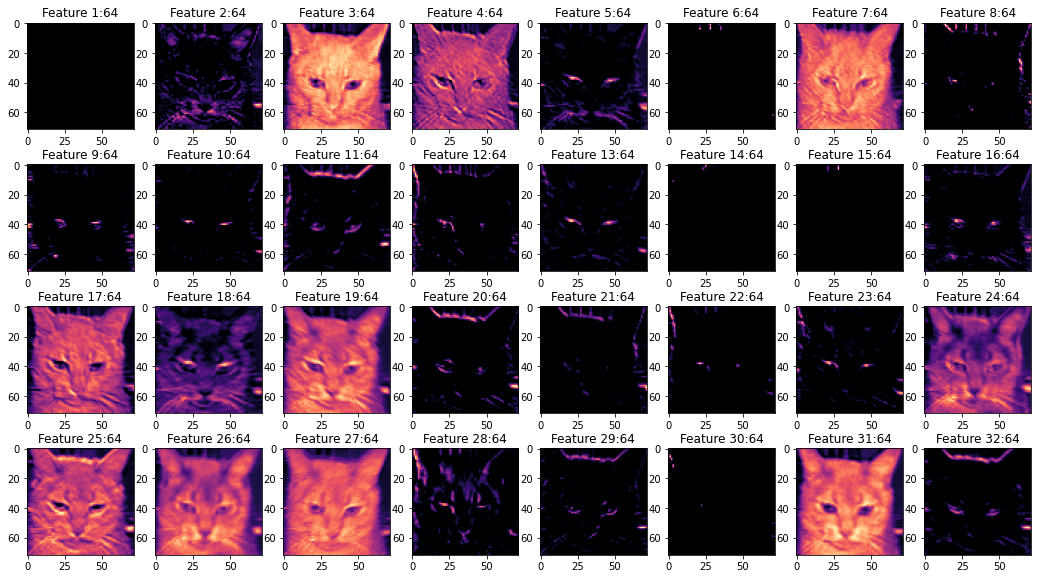

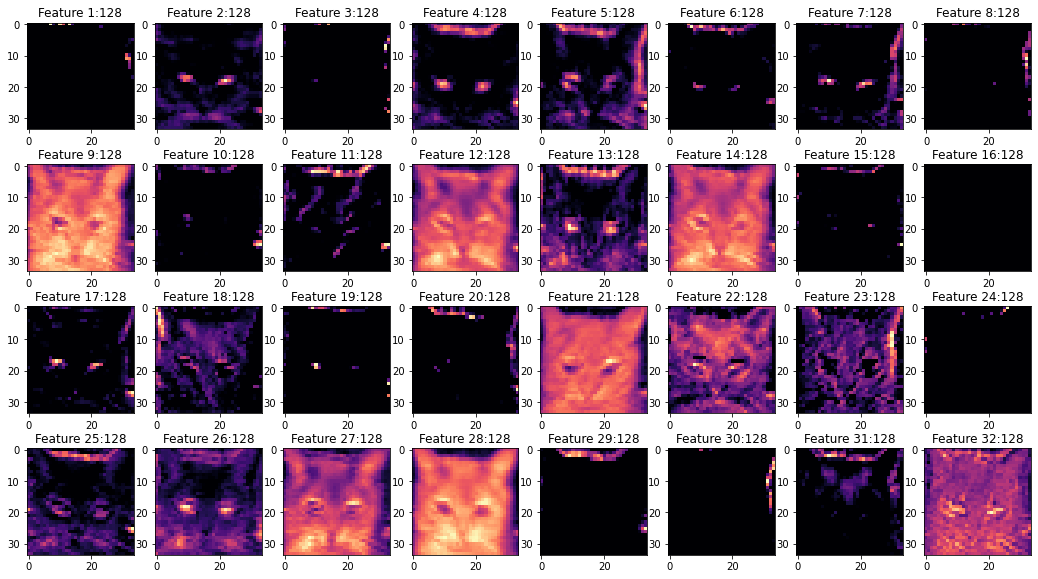

In [81]:
#Visualize feature maps for convolutional layers
layers = [visualize_layer0.predict(image), visualize_layer3.predict(image), visualize_layer6.predict(image)]
layer_size = [32,64,128]
n = 0

for layer in layers:
    pyplot.figure(figsize=(18,10))
    for i in range(1,33):
        pyplot.subplot(4,8,i)
        pyplot.imshow(layer[0,:,:,i-1] , cmap='magma')
        layer_num = 'Feature '+str(i)+':'+str(layer_size[n])
        pyplot.title(layer_num)    
    n+=1
    pyplot.show()
